# Simple Linear Regresion

In [30]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy as sc
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
text = "@laurenboebert Inflation is down by 6.5% https://t.co/pxUujOYbJr @SpeakerMcCarthy @GOP @RepMTG https://t.co/e4d12ZfyEJ #chrag"

In [3]:
new = []

for i in text.split(' '):
    if i.__contains__('#') or i.__contains__('@') or i.__contains__('https'):
        continue
    else: new.append(i)

print(" ".join(new))

Inflation is down by 6.5%


In [4]:
df = pd.read_csv('Data\LungDisease.csv')
df.head()

,PEFR,Exposure
0,390,0
1,410,0
2,430,0
3,460,0
4,420,1


In [5]:
y = df.PEFR
X = sm.add_constant(df.Exposure)

In [6]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=47,test_size=.4,)

In [7]:
model = sm.OLS(y_train,x_train).fit()

In [8]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   PEFR   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     11.17
Date:                Thu, 02 Mar 2023   Prob (F-statistic):            0.00133
Time:                        22:17:10   Log-Likelihood:                -440.72
No. Observations:                  73   AIC:                             885.4
Df Residuals:                      71   BIC:                             890.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        453.7845     30.038     15.107      0.000     393.889     513.680
Exposure      -6.2652      1.874     -3.342      0.001     -10.003      -2.528
==============================================================================
Omnibus:                        1.276   Durbin-Watson:                   2.168
Prob(Omnibus):                  0.528   Jarque-Bera (JB):                1.082
Skew:                           0.074   Prob(JB):                        0.582
Kurtosis:                       2.422   Cond. No.                         40.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
skmodel = LinearRegression()
skmodel.fit(x_train,y_train)

print(skmodel.coef_)

[ 0.         -6.26517508]


In [10]:
smpredict = model.predict(x_test)
skpredict = skmodel.predict(x_test)

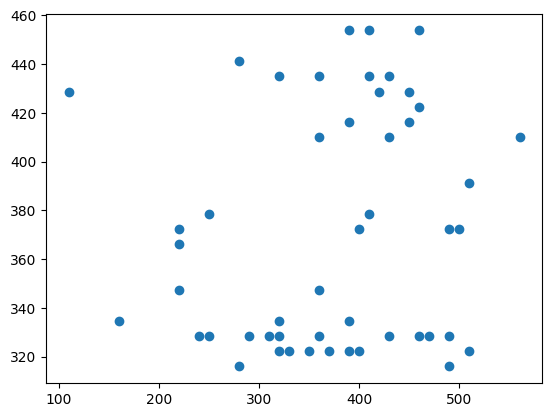

In [11]:
plt.scatter(x= y_test,y=smpredict)
# sns.scatterplot(x=y_test,y=skpredict)

In [12]:
residuals = y_test-skpredict
print(residuals)

75     -14.746162
0      -63.784489
91     -38.480987
102    161.519013
3        6.215511
94      -8.480987
109     47.784188
96      31.519013
106     -2.215812
5     -161.254139
99     101.519013
108     27.784188
10      -4.988964
107      7.784188
78      55.253838
40    -152.337213
18      21.276211
47     127.662787
86     -88.480987
30      20.071737
11     -24.988964
69    -174.746162
14    -318.723789
100    131.519013
44      27.662787
111     77.784188
1      -43.784489
22     -26.193438
49    -146.072038
60    -127.276512
88     -78.480987
38    -128.602388
112    187.784188
37     118.867262
17      -8.723789
39      31.397612
93     -18.480987
114    -35.950637
13    -114.988964
20      37.541387
101    141.519013
110     67.784188
29     -49.928263
62      12.723488
32     150.071737
46     117.662787
12     -74.988964
24      33.806562
118    174.049363
Name: PEFR, dtype: float64


# Multiple Linear Regression

In [38]:
hp = pd.read_csv("Data/house_sales.csv",sep='\t')
hp.head()

,DocumentDate,SalePrice,PropertyID,PropertyType,ym,zhvi_px,zhvi_idx,AdjSalePrice,NbrLivingUnits,SqFtLot,...,Bathrooms,Bedrooms,BldgGrade,YrBuilt,YrRenovated,TrafficNoise,LandVal,ImpsVal,ZipCode,NewConstruction
1,2014-09-16,280000,1000102,Multiplex,2014-09-01,405100,0.930836,300805.0,2,9373,...,3.00,6,7,1991,0,0,70000,229000,98002,False
2,2006-06-16,1000000,1200013,Single Family,2006-06-01,404400,0.929228,1076162.0,1,20156,...,3.75,4,10,2005,0,0,203000,590000,98166,True
3,2007-01-29,745000,1200019,Single Family,2007-01-01,425600,0.977941,761805.0,1,26036,...,1.75,4,8,1947,0,0,183000,275000,98166,False
4,2008-02-25,425000,2800016,Single Family,2008-02-01,418400,0.961397,442065.0,1,8618,...,3.75,5,7,1966,0,0,104000,229000,98168,False
5,2013-03-29,240000,2800024,Single Family,2013-03-01,351600,0.807904,297065.0,1,8620,...,1.75,4,7,1948,0,0,104000,205000,98168,False


In [39]:
hp['Year'] = [int(date.split('-')[0]) for date in hp.DocumentDate]
hp['Weight'] = hp.Year - 2005

In [18]:
hp.columns

Index(['DocumentDate', 'SalePrice', 'PropertyID', 'PropertyType', 'ym',
       'zhvi_px', 'zhvi_idx', 'AdjSalePrice', 'NbrLivingUnits', 'SqFtLot',
       'SqFtTotLiving', 'SqFtFinBasement', 'Bathrooms', 'Bedrooms',
       'BldgGrade', 'YrBuilt', 'YrRenovated', 'TrafficNoise', 'LandVal',
       'ImpsVal', 'ZipCode', 'NewConstruction'],
      dtype='object')

In [49]:
x1 = hp[['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade']]
y1 = hp['AdjSalePrice']

In [50]:
x1train,x1test,y1train,y1test = train_test_split(x1,y1,random_state=47,test_size=.4)
hpmodel = LinearRegression()
hpmodel.fit(x1train,y1train)

LinearRegression()

In [51]:
print(hpmodel.coef_)
print(hpmodel.intercept_)

[ 2.39192337e+02 -1.79522775e-01 -1.99975220e+04 -4.99041672e+04
  1.01655962e+05]
-498356.52250214363


In [52]:
hpreictions = hpmodel.predict(x1test)
RMSE = np.sqrt(mean_squared_error(y1test,hpreictions))
R2 = r2_score(y1test,hpreictions)

print('RMSE: ',RMSE)
print('R-Square: ',R2)

RMSE:  252054.0427446027
R-Square:  0.5458266109161911


#### Weighted Regresssion

In [53]:
hp_wt_model = LinearRegression()
hp_wt_model.fit(x1train,y1train,sample_weight=hp.Weight[:13612])

LinearRegression()

In [54]:
hpreictionswt = hp_wt_model.predict(x1test)
RMSE = np.sqrt(mean_squared_error(y1test,hpreictionswt))
R2 = r2_score(y1test,hpreictionswt)

print('RMSE: ',RMSE)
print('R-Square: ',R2)

RMSE:  252290.0646787562
R-Square:  0.5449756420612935
